Here's an extensive summary in markdown format, drawing on the provided sources, and our conversation history:

**Vector Stores**

*   **Core Function:** Vector stores are specialised data stores designed to index and retrieve information using vector representations, also known as embeddings. These embeddings capture the semantic meaning of the data. This enables searches based on semantic similarity rather than exact keyword matches.
*   **Key Concepts**:
    *   **Semantic Similarity**: Vector stores allow for searching based on the meaning of the data, rather than just keyword matching.
    *   **Embeddings**: Data is converted into numerical vector representations that capture its semantic meaning.
*   **Data Types:** Although the conceptual overview focuses on text, vector stores can be used to store and retrieve various data types beyond text, including images and audio.
*   **LangChain Integrations:** LangChain provides numerous integrations for different vector store implementations, allowing users to switch easily between them.
*   **Interface:** LangChain offers a standard interface for interacting with vector stores, simplifying the process of switching between different implementations. The interface includes key methods for:
    *   **`add_documents`**: Adds a list of texts to the vector store.
    *   **`delete_documents`**: Deletes a list of documents from the vector store.
    *   **`similarity_search`**: Searches for documents similar to a given query.
*   **Initialization:** Most vector stores in LangChain require an embedding model as an argument during initialization.
*   **Adding Documents**:
    *   The `add_documents` method is used to add documents to the vector store, accepting a list of `Document` objects.
    *   `Document` objects have `page_content` and `metadata` attributes, which allow for storing unstructured text and associated metadata.
    *   It is recommended to provide IDs for documents to enable updating instead of adding duplicates.

    ```python
    from langchain_core.documents import Document
    document_1 = Document(
        page_content="I had chocalate chip pancakes and scrambled eggs for breakfast this morning.",
        metadata={"source": "tweet"},
    )
    document_2 = Document(
        page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
        metadata={"source": "news"},
    )
    documents = [document_1, document_2]
    vector_store.add_documents(documents=documents)
    vector_store.add_documents(documents=documents, ids=["doc1", "doc2"])
    ```
*   **Deleting Documents**:
    *   The `delete_documents` method is used to remove documents from the vector store, taking a list of document IDs.
    ```python
        vector_store.delete_documents(ids=["doc1"])
    ```

*   **Searching**:
    *   Vector stores embed and store added documents.
    *   When a query is passed, the vector store embeds the query, performs a similarity search, and returns the most similar documents.
    *   This process requires a method to measure similarity between the query and embedded documents, and an algorithm for efficient similarity search across all embedded documents.
    *   **Similarity metrics:**
        *   **Cosine Similarity**: Measures the cosine of the angle between two vectors.
        *   **Euclidean Distance**: Measures the straight-line distance between two points.
        *   **Dot Product**: Measures the projection of one vector onto another.
        * The choice of similarity metric can sometimes be selected when initialising the vector store.
    *   **Similarity Search**:
        *   Many vector stores use algorithms like HNSW (Hierarchical Navigable Small World) for efficient similarity search.
        *   The LangChain vector store interface provides a `similarity_search` method that takes a query, creates an embedding, finds similar documents, and returns them as a list of `Documents`.
        ```python
        query = "my query"
        docs = vectorstore.similarity_search(query)
        ```
*  **Search Parameters:**
    *   The `similarity_search` method supports parameters such as `k` (number of documents to return) and `filter` (for filtering documents by metadata).

    *  **Metadata Filtering**:
        *   Many vector stores support filtering on metadata, allowing for structured queries to reduce the search space.
        *   This feature is dependent on the underlying vector store implementation.
        ```python
        vectorstore.similarity_search(
            "LangChain provides abstractions to make working with LLMs easy",
            k=2,
            filter={"source": "tweet"},
        )
        ```
*   **Advanced Search Techniques:**
    *   **Maximal Marginal Relevance (MMR):** A re-ranking algorithm to diversify search results, applied after the initial similarity search to ensure less redundancy.
    *   **Hybrid Search:** Combines keyword and semantic similarity search. Although there is no unified way to do this with LangChain vector stores, it can often be achieved by passing a keyword argument with `similarity_search`.
    *   Hybrid search is used when combining keyword based and semantic similarity. MMR is used when needing to diversify search results.

**Embedding Models**

*   **Core Function:** Embedding models are used to transform text into numerical vector representations, effectively capturing the semantic meaning of the text. These numerical representations, known as "embeddings", enable machines to understand and compare text with speed and accuracy.
*   **Key Concepts**:
    *   **Text as Vectors:** Text is converted into numerical vectors.
    *   **Similarity Measurement:** These vectors can be compared using mathematical operations to determine how similar the texts are.
*   **Historical Context**:
    *   **BERT** (Bidirectional Encoder Representations from Transformers) was a pivotal advancement, applying transformer models to embed text.
    *   **SBERT** (Sentence-BERT) was developed to generate semantically rich sentence embeddings, which can be compared using similarity metrics like cosine similarity.
*   **LangChain Interface**: LangChain provides a universal interface for working with various embedding models, including two primary methods:
    *   `embed_documents`: Embeds multiple texts (documents).
    *   `embed_query`: Embeds a single text (query).
*   **Similarity Metrics**: These metrics are used to compare the embedding vectors.
    *   **Cosine Similarity**: Measures the cosine of the angle between two vectors.
    *   **Euclidean Distance**: Measures the straight-line distance between two points.
    *   **Dot Product**: Measures the projection of one vector onto another.
    *   The choice of metric depends on the model; for example, **OpenAI suggests cosine similarity for their embeddings**.
*   **Practical Example**: The following code demonstrates how to use LangChain's `embed_documents` method with the OpenAI embeddings model:

    ```python
    from langchain_openai import OpenAIEmbeddings
    embeddings_model = OpenAIEmbeddings()
    embeddings = embeddings_model.embed_documents(
    [
    "Hi there!",
    "Oh, hello!",
    "What's your name?",
    "My friends call me World",
    "Hello World!"
    ]
    )
    len(embeddings), len(embeddings)
    # Output: (5, 1536)
    ```

**Text Splitters**

*   **Purpose:** Document splitting is a crucial preprocessing step that divides large texts into smaller, more manageable chunks. This process is essential for ensuring consistent processing, overcoming model input size limits, and improving text representation quality.
*   **Key Concepts:** Text splitters break down documents into smaller chunks that are more suitable for downstream applications.
*   **Reasons for Splitting**:
    *   **Handling non-uniform document lengths**.
    *   **Overcoming model input limitations**.
    *   **Improving representation quality** by focusing on smaller, more specific sections of text.
    *   **Enhancing retrieval precision** by allowing more precise matching of queries to relevant sections.
    *   **Optimising computational resources**.
*   **Approaches**:
    *   **Length-based**: Splits documents based on their length.
        *   **Token-based**: Splits based on the number of tokens.
        *   **Character-based**: Splits based on the number of characters.
    *   **Text-structured based**: Splits documents based on their natural hierarchical structure (paragraphs, sentences, words).
        *   LangChain's `RecursiveCharacterTextSplitter` is an example.
    *   **Document-structured based**: Splits documents based on their inherent structure (HTML, Markdown, JSON, code).
        *   Examples include splitting Markdown by headers, HTML by tags, and JSON by objects or arrays.
    *   **Semantic meaning based**: Splits text when there are significant changes in meaning, using techniques such as comparing embeddings of sliding windows of text.
*   **Example of Length-Based Splitting**:
    ```python
    from langchain_text_splitters import CharacterTextSplitter
    text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name = "cl100k_base", chunk_size = 100, chunk_overlap = 0
    )
    texts = text_splitter.split_text(document)
    ```
*   **Example of Text-Structured Splitting**:
      ```python
    from langchain_text_splitters import RecursiveCharacterTextSplitter
    text_splitter = RecursiveCharacterTextSplitter(chunk_size = 100, chunk_overlap = 0)
    texts = text_splitter.split_text(document)
     ```

**Summary of Previous Conversational Turns**

*   **Document Loaders**: LangChain provides a unified way to load data from various sources using a consistent interface. They offer methods such as `.load()` and `.lazy_load()` and have many integration options.
*   **Retrieval Systems:** These are designed to efficiently identify relevant information. They often use natural language interfaces, and they perform query analysis to optimise retrieval. Common retrieval systems are lexical search indexes, vector indexes, relational databases, and graph databases. LangChain provides a unified interface through the retriever concept to work with these systems.

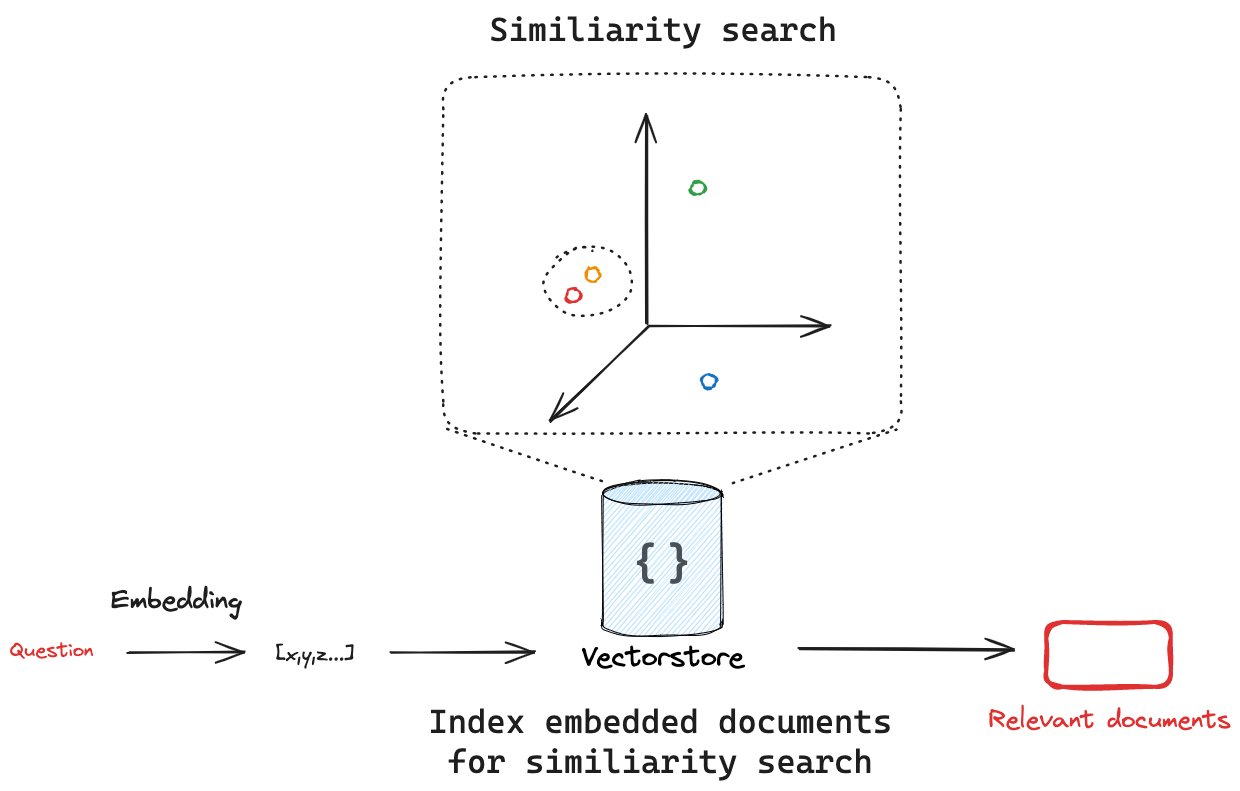

In [1]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_ollama import OllamaEmbeddings

# Initialize with an embedding model
vector_store = InMemoryVectorStore(embedding=OllamaEmbeddings(model="snowflake-arctic-embed2"))

In [2]:
from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocalate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

documents = [document_1, document_2]

vector_store.add_documents(documents=documents)

['eb03d9cd-2463-4570-96f5-263dc3321cc1',
 'f37d504a-79cf-4027-bb87-7ced3b182314']

In [3]:
vector_store.add_documents(documents=documents, ids=["doc1", "doc2"])

['doc1', 'doc2']

In [ ]:
vector_store.delete(ids=["doc1"])

In [7]:
type(vector_store.store)

dict

In [11]:
??vector_store.similarity_search

Signature: vector_store.similarity_search(query: 'str', k: 'int' = 4, **kwargs: 'Any') -> 'list[Document]'
Docstring:
Return docs most similar to query.

Args:
    query: Input text.
    k: Number of Documents to return. Defaults to 4.
    **kwargs: Arguments to pass to the search method.

Returns:
    List of Documents most similar to the query.
Source:   
    def similarity_search(
        self, query: str, k: int = 4, **kwargs: Any
    ) -> list[Document]:
        return [doc for doc, _ in self.similarity_search_with_score(query, k, **kwargs)]
File:      ~/miniconda3/envs/langchain/lib/python3.11/site-packages/langchain_core/vectorstores/in_memory.py
Type:      method

In [10]:
query = "my query"
docs = vector_store.similarity_search(query)
docs

[Document(id='eb03d9cd-2463-4570-96f5-263dc3321cc1', metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.'),
 Document(id='doc2', metadata={'source': 'news'}, page_content='The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.'),
 Document(id='f37d504a-79cf-4027-bb87-7ced3b182314', metadata={'source': 'news'}, page_content='The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.')]

In [19]:
query = "my query"
docs = vector_store.similarity_search(query, filter=lambda x: x.metadata["source"] == "news")
docs

[Document(id='doc2', metadata={'source': 'news'}, page_content='The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.'),
 Document(id='f37d504a-79cf-4027-bb87-7ced3b182314', metadata={'source': 'news'}, page_content='The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.')]

In [12]:
query = "my query"
docs = vector_store.similarity_search(query, k=1)
docs

[Document(id='eb03d9cd-2463-4570-96f5-263dc3321cc1', metadata={'source': 'tweet'}, page_content='I had chocalate chip pancakes and scrambled eggs for breakfast this morning.')]